# Titanic - Machine Learning from DisasterOur project aims to predict the numbers of Titanic crash survivors!


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.impute import SimpleImputer 

from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score

import warnings
warnings.filterwarnings("ignore")

### Read data

In [2]:
train_d = pd.read_csv('/kaggle/input/titanic/train.csv')
test_d = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_d.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_d.info() , test_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

## Step 1: Clean Data

In [6]:
#Checking for the train data
nulls = train_d.isna().sum()
nulls[nulls > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

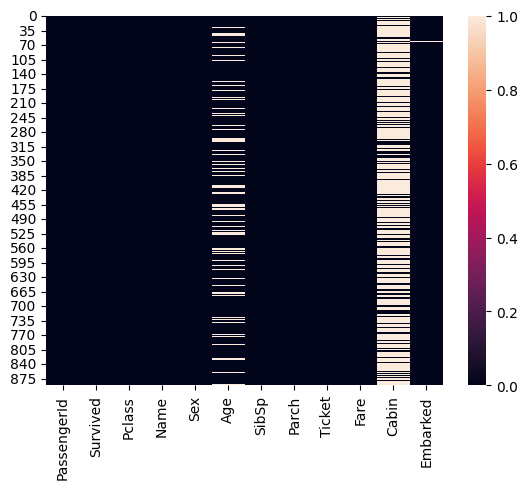

In [7]:
sns.heatmap(train_d.isna())

That White lines represents a null value
and we can see here that there are null values in Age , Cabin

In [8]:
#Checking for the test data
nulls = test_d.isna().sum()
nulls[nulls > 0]

Age       86
Fare       1
Cabin    327
dtype: int64

<Axes: >

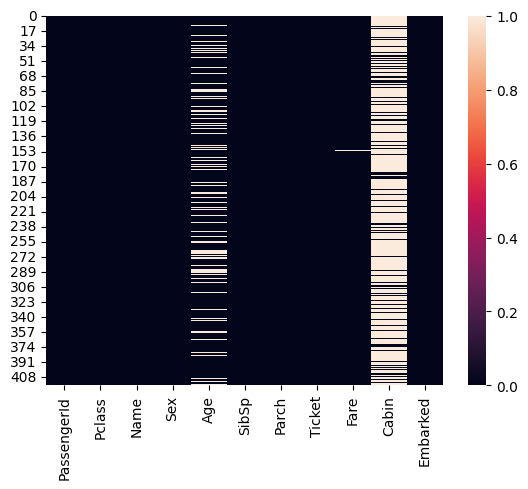

In [9]:
sns.heatmap(test_d.isna())

We can see here that there are null values in Age , Fare , Cabin

In [10]:
#Before Starting to delete null values lets drop useless features
def clean(data) :
    data.drop(columns  = ['Embarked' , 'Name' , 'Cabin' , 'Ticket'], axis = 1, inplace = True)
    return data

In [11]:
#Delete that columns from the train and test datasets
clean(train_d)
clean(test_d)
train_d

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


Now the columns are deleted

In [12]:
#fill the missing values for some features
imputer = SimpleImputer(strategy='mean')
def impute(data):
    data['Age'] = imputer.fit_transform(data[['Age']])
    data['Fare'] = imputer.fit_transform(data[['Fare']])
    return data

<Axes: >

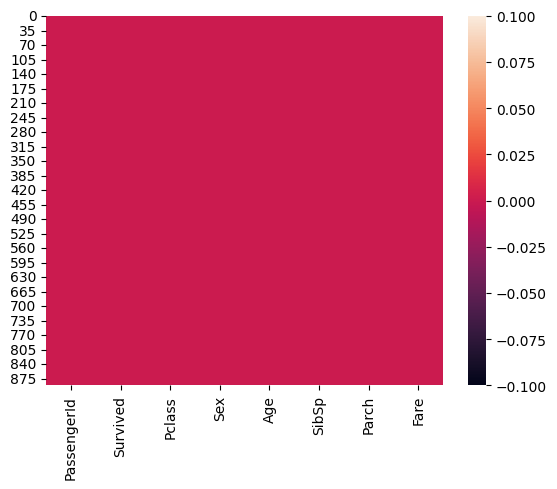

In [13]:
impute(train_d)
impute(test_d)
sns.heatmap(train_d.isna())

Now there are no null values

## Step 2: Data Analysis

In [14]:
#Statistical information
train_d.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [15]:
test_d.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.50000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.00000,3.00,3.0000
Age,418.0,30.272590,12.634534,0.17,23.0000,30.27259,35.75,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.00000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.00000,0.00,9.0000
Fare,418.0,35.627188,55.840500,0.00,7.8958,14.45420,31.50,512.3292


In [16]:
#To make a perfect correlation matrix we need to encode the categorical features first
encoder = LabelEncoder()
def encode(data):
    data['Sex']= encoder.fit_transform(data['Sex'])
    return data
encode(train_d)
encode(test_d)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.50000,0,0,7.8292
1,893,3,0,47.00000,1,0,7.0000
2,894,2,1,62.00000,0,0,9.6875
3,895,3,1,27.00000,0,0,8.6625
4,896,3,0,22.00000,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500
414,1306,1,0,39.00000,0,0,108.9000
415,1307,3,1,38.50000,0,0,7.2500
416,1308,3,1,30.27259,0,0,8.0500


Now Male is equal to 1 and Female is equal to 0

<Axes: title={'center': 'Correlation Matrix for the train dataset'}>

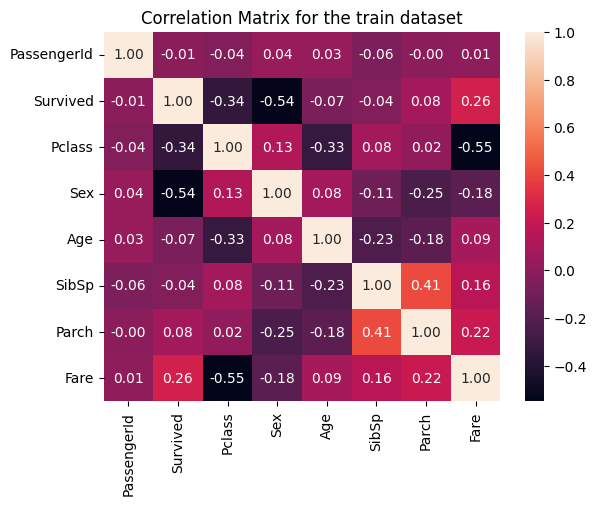

In [17]:
#Correlation matrix
corr_mat = train_d.corr()
plt.title("Correlation Matrix for the train dataset")
sns.heatmap(corr_mat , annot = True,fmt='.2f')

### Now lets check on some features and their relations to the survived feature

In [18]:
#from the correlation matrix we can figure out that the relation between 'Pclass , Sex' are pretty high so lets visualize each one of them

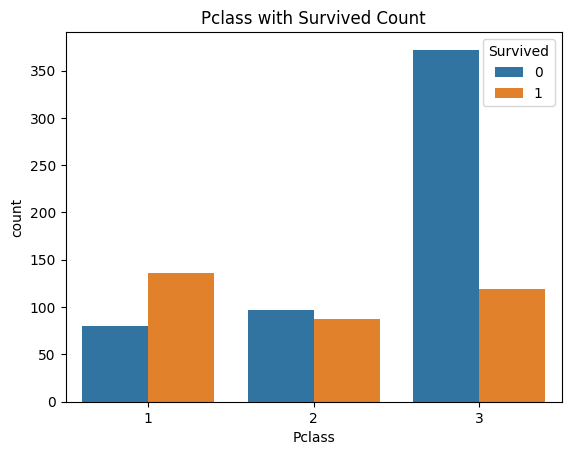

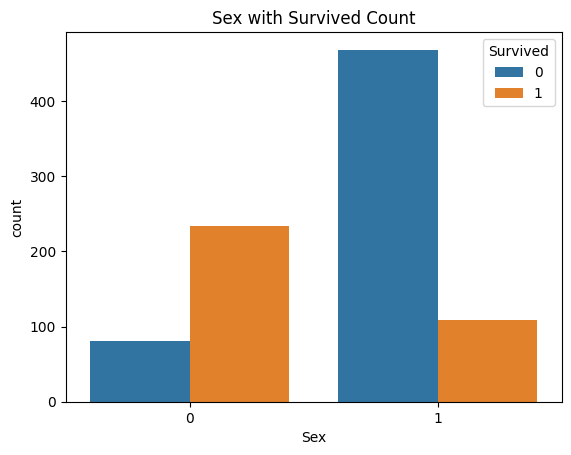

In [19]:
features = ['Pclass', 'Sex']
for i in features:
    sns.countplot(data=train_d , x =train_d[i] , hue = train_d['Survived'])
    plt.title(f"{i} with Survived Count")
    plt.show()

From the data above we can see that the number of females(0) which survived is higher than males

and the pclass 1 is the highest in the survived rate

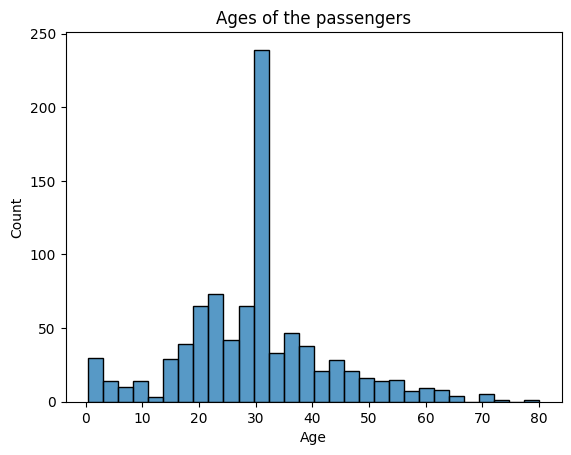

In [20]:
sns.histplot(train_d['Age'])
plt.title("Ages of the passengers")
plt.show()

## Step 3: Modeling and Evaluating

In [21]:
X = train_d.drop("Survived", axis=1 )
y = train_d['Survived']

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=4)

In [23]:
models = {'LogisticReg':LogisticRegression()
         ,'DecisionTree':DecisionTreeClassifier()
         ,'RandForest':RandomForestClassifier()
         ,'SVC':SVC()
         ,'GaussianNaiveBayes':GaussianNB()
         ,'KNN':KNeighborsClassifier()
         ,'GradientBoost':GradientBoostingClassifier()}

In [24]:
# Create an empty dictionary to store the results
metrics_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Loop through each model, train, predict, and collect the metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict using the test set
    
    # Calculate the evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the results to the dictionary
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(acc)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by accuracy for better visibility
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)

# Display the DataFrame in a clear tabular format
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
2,RandForest,0.860335,0.843137,0.716667,0.774775
6,GradientBoost,0.854749,0.826923,0.716667,0.767857
0,LogisticReg,0.815642,0.764706,0.650000,0.702703
1,DecisionTree,0.804469,0.735849,0.650000,0.690265
4,GaussianNaiveBayes,0.804469,0.719298,0.683333,0.700855
3,SVC,0.698324,0.875000,0.116667,0.205882
5,KNN,0.681564,0.533333,0.400000,0.457143


We can notice that the highest one in them all is the Random Forest

In [25]:
FinalModel = RandomForestClassifier()
FinalModel.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
# make a variable to store the values of the predctions
FinalPredcs = FinalModel.predict(test_d)
#test on the other data set that we want it to be the output for the submission

In [27]:
#make a variable to store the values of the passengers id
PassIDS = test_d['PassengerId']

In [28]:
Final_Result = pd.DataFrame({'PassengerId':PassIDS,'Survived':FinalPredcs})

In [29]:
Final_Result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [30]:
Final_Result.to_csv("submission.csv",index = False)